In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Data loading and undestanding

In [2]:
df = pd.read_csv(r"C:\Users\rjabj\Desktop\projects\au cour\Projet islam\anomaly-detection-in-helicopter-data\dfvalid_groundtruth.csv")
df

,seqID,anomaly
0,0,0.0
1,1,1.0
2,2,0.0
3,3,0.0
4,4,1.0
...,...,...
589,589,1.0
590,590,1.0
591,591,0.0
592,592,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   seqID    594 non-null    int64  
 1   anomaly  594 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 9.4 KB


In [4]:
df.describe()

,seqID,anomaly
count,594.000000,594.000000
mean,296.500000,0.500000
std,171.617307,0.500421
min,0.000000,0.000000
25%,148.250000,0.000000
50%,296.500000,0.500000
75%,444.750000,1.000000
max,593.000000,1.000000


In [5]:
df.isnull().sum()

seqID      0
anomaly    0
dtype: int64

In [6]:
df.isnull().sum().sum()

0

In [7]:
train = pd.read_csv(r"C:\Users\rjabj\Desktop\projects\au cour\Projet islam\anomaly-detection-in-helicopter-data\train_df.csv")
train

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,61430,61431,61432,61433,61434,61435,61436,61437,61438,61439
0,0,0.041259,0.041259,0.032573,0.023887,0.029315,0.041259,0.045602,0.038001,0.030401,...,0.034744,-0.007600,-0.003257,0.065145,0.047773,-0.009772,0.031487,0.096632,0.077089,0.040173
1,1,-0.211722,-0.264924,-0.274696,-0.236694,-0.156349,-0.059716,0.005429,0.046687,0.153091,...,0.260581,-0.004343,-0.241037,-0.636252,-0.953292,-0.980436,-0.846888,-0.838202,-0.880546,-0.739398
2,2,0.214105,0.154930,0.136640,0.013987,-0.038733,-0.015063,-0.111894,-0.104363,0.047340,...,0.040884,0.375490,0.699337,0.965085,1.086662,1.132926,1.279249,1.296464,0.937112,0.451879
3,3,-0.154837,-0.127768,-0.217638,-0.284770,-0.299929,-0.270694,-0.077960,0.092036,0.076877,...,-0.286936,-0.171079,-0.036814,-0.024904,0.031400,0.140761,-0.011911,-0.173244,-0.063884,0.081208
4,4,-1.022780,-0.916376,-0.676425,-0.461445,-0.330069,-0.122690,0.178064,0.489675,0.799115,...,1.009751,1.134613,0.836030,0.479903,0.109661,-0.285553,-0.628651,-0.916376,-1.010837,-0.804544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,1672,-0.063989,0.017228,0.015997,-0.321177,-0.503300,-0.535295,-0.562367,-0.600515,-0.573442,...,-0.121826,-0.134131,-0.111981,-0.057836,-0.073834,-0.125517,-0.082448,-0.036917,-0.114442,-0.183354
1673,1673,0.993037,0.726052,0.341885,0.286314,0.535177,0.605245,0.198124,-0.375711,-0.579875,...,0.038658,0.188460,0.273025,0.045907,-0.108727,0.072484,0.415577,0.356382,-0.096646,-0.280273
1674,1674,0.570550,0.253578,-0.193841,-0.502279,-0.657108,-0.838757,-0.971642,-0.881427,-0.700996,...,-0.146295,0.128008,0.162143,0.018287,-0.017068,0.087777,0.062175,-0.041450,-0.140199,-0.247482
1675,1675,0.630677,0.605010,0.477897,0.155225,-0.441229,-0.679566,-0.515786,-0.424118,-0.183336,...,0.229781,-0.041556,-0.176003,-0.301894,-0.177225,0.033001,0.025667,0.088001,0.206559,0.003667


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Columns: 61441 entries, Unnamed: 0 to 61439
dtypes: float64(61440), int64(1)
memory usage: 786.1 MB


In [9]:
train.describe()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,61430,61431,61432,61433,61434,61435,61436,61437,61438,61439
count,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,...,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000
mean,838.000000,-0.000664,-0.003480,0.009613,0.022475,0.035903,0.052162,0.070455,0.075893,0.056307,...,0.020256,0.015946,0.016758,-0.004421,-0.036975,-0.033517,-0.008975,0.008112,0.023029,0.021341
std,484.252517,0.883526,0.835984,0.869802,0.950403,0.943731,0.820365,0.821559,0.912041,0.946185,...,0.961493,0.899654,0.824489,0.887419,1.008669,0.948533,0.848945,0.828805,0.878701,0.937541
min,0.000000,-7.496269,-6.943695,-8.947082,-8.999418,-8.675663,-6.466582,-7.234588,-8.339737,-8.434672,...,-11.528603,-11.482352,-5.818084,-8.860666,-11.643012,-9.185638,-6.622374,-5.228544,-5.582950,-7.378208
25%,419.000000,-0.289418,-0.275076,-0.249610,-0.228466,-0.208194,-0.185055,-0.193743,-0.201396,-0.217878,...,-0.234523,-0.219484,-0.273884,-0.250809,-0.276299,-0.262135,-0.243445,-0.249727,-0.269485,-0.266519
50%,838.000000,0.010897,0.009686,0.017095,0.037735,0.036144,0.041957,0.031078,0.036482,0.024679,...,0.024451,0.020697,0.017085,0.007381,0.008569,0.007627,0.015201,0.017266,0.013833,0.010897
75%,1257.000000,0.246873,0.253578,0.282030,0.355087,0.319822,0.336642,0.346068,0.346441,0.305343,...,0.261427,0.273942,0.276877,0.278753,0.258901,0.259495,0.296717,0.300365,0.270694,0.258418
max,1676.000000,8.915436,6.995956,6.021115,7.587554,9.290311,6.056075,5.907922,8.528391,9.600678,...,9.415675,8.440758,6.173255,5.638937,7.671535,10.300524,6.886490,7.020374,8.585596,9.847754


In [10]:
train.isnull().sum().sum()

0

In [11]:
val_series = pd.read_csv(r"C:\Users\rjabj\Desktop\projects\au cour\Projet islam\anomaly-detection-in-helicopter-data\validation_df.csv")
val_series

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,61430,61431,61432,61433,61434,61435,61436,61437,61438,61439
0,0,0.070650,0.085524,0.076847,0.085524,0.120229,0.140061,0.107834,0.048340,0.014874,...,0.018592,-0.017353,-0.049579,-0.061974,-0.022311,0.052058,0.091721,0.075608,0.045861,0.027268
1,1,-0.300685,-0.882656,-1.733789,-2.181179,-1.942328,-1.719240,-1.981126,-2.323034,-2.325459,...,0.454665,-0.782024,-1.725302,-1.829572,-1.170004,-0.278861,-0.152767,-1.035424,-2.312123,-3.199628
2,2,-0.056398,-0.152028,-0.058850,0.140994,0.170419,0.154480,0.270954,0.359228,0.334708,...,0.023295,-0.019617,-0.062528,-0.094405,-0.105439,-0.123830,-0.166741,-0.159385,-0.106665,-0.131186
3,3,0.030618,0.020412,0.058747,0.124712,0.155828,0.161553,0.167777,0.170515,0.165038,...,-0.073682,-0.052524,-0.023897,-0.009210,0.016429,0.058000,0.097828,0.114755,0.090360,0.054764
4,4,-1.071597,-6.912540,-13.677612,-16.463519,-15.790084,-11.653620,-7.668311,-9.942997,-14.321553,...,-5.227723,-6.107613,-6.577051,-6.123589,-5.324806,-4.965969,-4.464579,-3.442138,-3.794831,-6.133420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,589,-18.291415,-18.288957,-18.285270,-18.282812,-18.280354,-18.276668,-18.271752,-18.268065,-18.268065,...,-19.514201,-19.514201,-19.515430,-19.514201,-19.511744,-19.506828,-19.501912,-19.496996,-19.493310,-19.490852
590,590,-13.352138,-13.352138,-13.352138,-13.352138,-13.352138,-13.352138,-13.352138,-13.352138,-13.352138,...,-13.352138,-13.352138,-13.352138,-13.352138,-13.352138,-13.352138,-13.352138,-13.352138,-13.352138,-13.352138
591,591,0.031800,-0.143735,-0.059784,0.248039,0.283655,-0.010176,-0.153911,0.069960,0.283655,...,0.185711,0.151367,0.166631,0.171719,0.153911,0.160271,0.141191,0.050880,-0.020352,0.025440
592,592,-0.026635,-0.026635,-0.006721,0.009210,-0.008464,-0.036094,-0.039082,-0.026137,-0.017674,...,0.104549,0.103802,0.104798,0.094841,0.073184,0.058747,0.062978,0.081399,0.103056,0.113760


In [12]:
val_series.isnull().sum().sum()

0

## data visualisation

In [14]:
def plot_series(time, series, format="-", start=0, end=None):
    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))

    if type(series) is tuple:

      for series_num in series:
        # Plot the time series data
        plt.plot(time[start:end], series_num[start:end], format)

    else:
      # Plot the time series data
      plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

In [15]:
df_vis= df.to_numpy()


In [16]:
df_vis

array([[  0.,   0.],
       [  1.,   1.],
       [  2.,   0.],
       ...,
       [591.,   0.],
       [592.,   0.],
       [593.,   1.]])

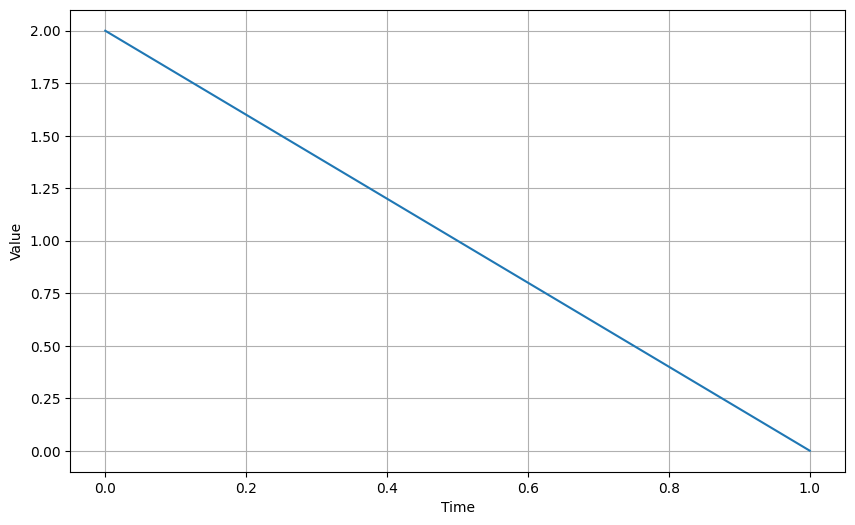

In [17]:
plot_series(np.arange(df_vis.shape[1]), df_vis[2])

In [18]:
train_vis= train.to_numpy()
train_vis

array([[ 0.00000000e+00,  4.12586444e-02,  4.12586444e-02, ...,
         9.66320816e-02,  7.70885125e-02,  4.01728891e-02],
       [ 1.00000000e+00, -2.11721976e-01, -2.64923908e-01, ...,
        -8.38201866e-01, -8.80546278e-01, -7.39398282e-01],
       [ 2.00000000e+00,  2.14104774e-01,  1.54930096e-01, ...,
         1.29646364e+00,  9.37111895e-01,  4.51879440e-01],
       ...,
       [ 1.67400000e+03,  5.70549949e-01,  2.53577755e-01, ...,
        -4.14502100e-02, -1.40199239e-01, -2.47482137e-01],
       [ 1.67500000e+03,  6.30676809e-01,  6.05009730e-01, ...,
         8.80014152e-02,  2.06558877e-01,  3.66672564e-03],
       [ 1.67600000e+03,  8.39096452e-02,  4.44227533e-02, ...,
         8.14417144e-02,  8.39096452e-02,  8.76115413e-02]])

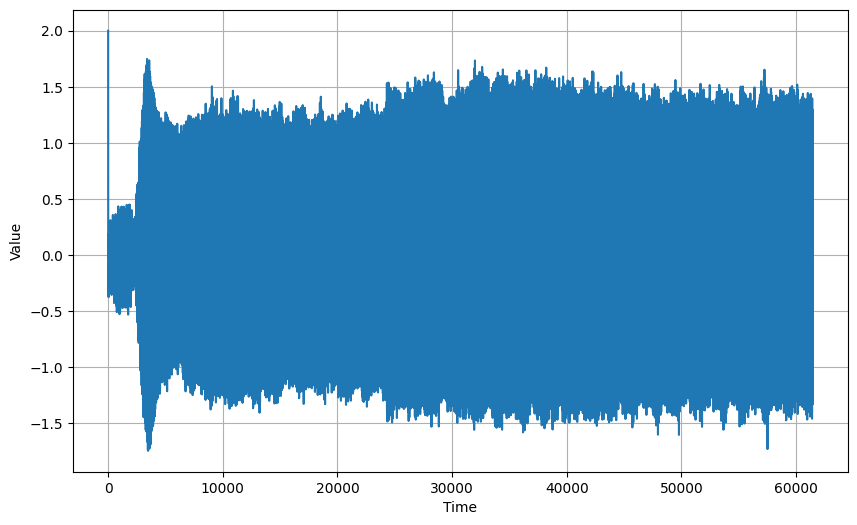

In [19]:
plot_series(np.arange(train_vis.shape[1]), train_vis[2])

In [20]:
val_series_vis= val_series.to_numpy()

In [21]:
val_series_vis

array([[ 0.00000000e+00,  7.06500730e-02,  8.55237726e-02, ...,
         7.56079729e-02,  4.58605737e-02,  2.72684492e-02],
       [ 1.00000000e+00, -3.00685048e-01, -8.82656108e-01, ...,
        -1.03542351e+00, -2.31212252e+00, -3.19962839e+00],
       [ 2.00000000e+00, -5.63976263e-02, -1.52028382e-01, ...,
        -1.59384595e-01, -1.06665075e-01, -1.31185782e-01],
       ...,
       [ 5.91000000e+02,  3.17998406e-02, -1.43735279e-01, ...,
         5.08797449e-02, -2.03518982e-02,  2.54398725e-02],
       [ 5.92000000e+02, -2.66351675e-02, -2.66351675e-02, ...,
         8.13990646e-02,  1.03055696e-01,  1.13759549e-01],
       [ 5.93000000e+02, -1.16103246e+00, -6.74458692e-01, ...,
        -2.64965917e-02, -4.56464008e-01, -7.93693355e-01]])

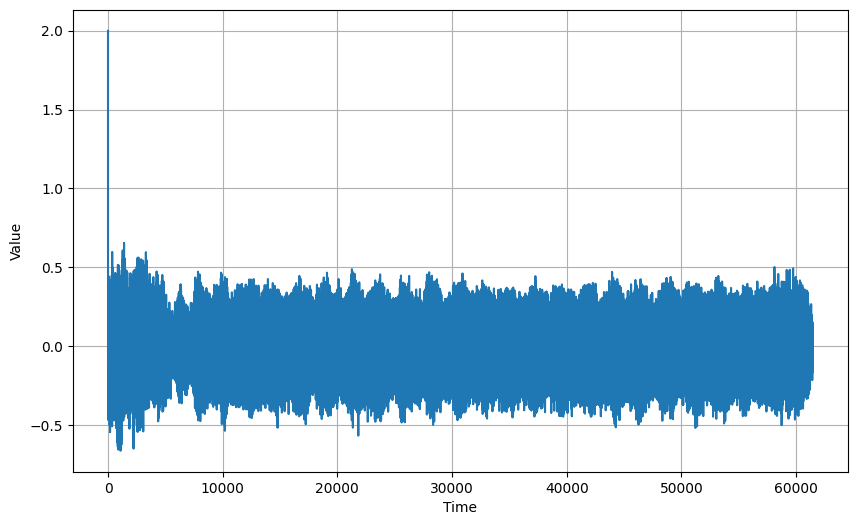

In [22]:
plot_series(np.arange(val_series_vis.shape[1]), val_series_vis[2])

# Data transformation

In [16]:
train = train.drop(columns=['Unnamed: 0'])

In [17]:
train

,0,1,2,3,4,5,6,7,8,9,...,61430,61431,61432,61433,61434,61435,61436,61437,61438,61439
0,0.041259,0.041259,0.032573,0.023887,0.029315,0.041259,0.045602,0.038001,0.030401,0.032573,...,0.034744,-0.007600,-0.003257,0.065145,0.047773,-0.009772,0.031487,0.096632,0.077089,0.040173
1,-0.211722,-0.264924,-0.274696,-0.236694,-0.156349,-0.059716,0.005429,0.046687,0.153091,0.281210,...,0.260581,-0.004343,-0.241037,-0.636252,-0.953292,-0.980436,-0.846888,-0.838202,-0.880546,-0.739398
2,0.214105,0.154930,0.136640,0.013987,-0.038733,-0.015063,-0.111894,-0.104363,0.047340,-0.054871,...,0.040884,0.375490,0.699337,0.965085,1.086662,1.132926,1.279249,1.296464,0.937112,0.451879
3,-0.154837,-0.127768,-0.217638,-0.284770,-0.299929,-0.270694,-0.077960,0.092036,0.076877,0.154837,...,-0.286936,-0.171079,-0.036814,-0.024904,0.031400,0.140761,-0.011911,-0.173244,-0.063884,0.081208
4,-1.022780,-0.916376,-0.676425,-0.461445,-0.330069,-0.122690,0.178064,0.489675,0.799115,0.931577,...,1.009751,1.134613,0.836030,0.479903,0.109661,-0.285553,-0.628651,-0.916376,-1.010837,-0.804544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,-0.063989,0.017228,0.015997,-0.321177,-0.503300,-0.535295,-0.562367,-0.600515,-0.573442,-0.317485,...,-0.121826,-0.134131,-0.111981,-0.057836,-0.073834,-0.125517,-0.082448,-0.036917,-0.114442,-0.183354
1673,0.993037,0.726052,0.341885,0.286314,0.535177,0.605245,0.198124,-0.375711,-0.579875,-0.495310,...,0.038658,0.188460,0.273025,0.045907,-0.108727,0.072484,0.415577,0.356382,-0.096646,-0.280273
1674,0.570550,0.253578,-0.193841,-0.502279,-0.657108,-0.838757,-0.971642,-0.881427,-0.700996,-0.520566,...,-0.146295,0.128008,0.162143,0.018287,-0.017068,0.087777,0.062175,-0.041450,-0.140199,-0.247482
1675,0.630677,0.605010,0.477897,0.155225,-0.441229,-0.679566,-0.515786,-0.424118,-0.183336,0.394784,...,0.229781,-0.041556,-0.176003,-0.301894,-0.177225,0.033001,0.025667,0.088001,0.206559,0.003667


In [18]:
val_series=val_series.drop(columns=['Unnamed: 0'])

In [19]:
val_series['anomaly']=df['anomaly']

In [20]:
val_series

,0,1,2,3,4,5,6,7,8,9,...,61431,61432,61433,61434,61435,61436,61437,61438,61439,anomaly
0,0.070650,0.085524,0.076847,0.085524,0.120229,0.140061,0.107834,0.048340,0.014874,0.030987,...,-0.017353,-0.049579,-0.061974,-0.022311,0.052058,0.091721,0.075608,0.045861,0.027268,0.0
1,-0.300685,-0.882656,-1.733789,-2.181179,-1.942328,-1.719240,-1.981126,-2.323034,-2.325459,-2.349708,...,-0.782024,-1.725302,-1.829572,-1.170004,-0.278861,-0.152767,-1.035424,-2.312123,-3.199628,1.0
2,-0.056398,-0.152028,-0.058850,0.140994,0.170419,0.154480,0.270954,0.359228,0.334708,0.349420,...,-0.019617,-0.062528,-0.094405,-0.105439,-0.123830,-0.166741,-0.159385,-0.106665,-0.131186,0.0
3,0.030618,0.020412,0.058747,0.124712,0.155828,0.161553,0.167777,0.170515,0.165038,0.141141,...,-0.052524,-0.023897,-0.009210,0.016429,0.058000,0.097828,0.114755,0.090360,0.054764,0.0
4,-1.071597,-6.912540,-13.677612,-16.463519,-15.790084,-11.653620,-7.668311,-9.942997,-14.321553,-13.704648,...,-6.107613,-6.577051,-6.123589,-5.324806,-4.965969,-4.464579,-3.442138,-3.794831,-6.133420,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,-18.291415,-18.288957,-18.285270,-18.282812,-18.280354,-18.276668,-18.271752,-18.268065,-18.268065,-18.270523,...,-19.514201,-19.515430,-19.514201,-19.511744,-19.506828,-19.501912,-19.496996,-19.493310,-19.490852,1.0
590,-13.352138,-13.352138,-13.352138,-13.352138,-13.352138,-13.352138,-13.352138,-13.352138,-13.352138,-13.352138,...,-13.352138,-13.352138,-13.352138,-13.352138,-13.352138,-13.352138,-13.352138,-13.352138,-13.352138,1.0
591,0.031800,-0.143735,-0.059784,0.248039,0.283655,-0.010176,-0.153911,0.069960,0.283655,0.183167,...,0.151367,0.166631,0.171719,0.153911,0.160271,0.141191,0.050880,-0.020352,0.025440,0.0
592,-0.026635,-0.026635,-0.006721,0.009210,-0.008464,-0.036094,-0.039082,-0.026137,-0.017674,-0.017674,...,0.103802,0.104798,0.094841,0.073184,0.058747,0.062978,0.081399,0.103056,0.113760,0.0


In [21]:
from sklearn.model_selection import train_test_split
val_data, test_data = train_test_split(df, test_size=0.5, random_state=42, shuffle=False)

In [22]:
val_data

,seqID,anomaly
0,0,0.0
1,1,1.0
2,2,0.0
3,3,0.0
4,4,1.0
...,...,...
292,292,0.0
293,293,0.0
294,294,1.0
295,295,0.0


In [23]:
test_data

,seqID,anomaly
297,297,0.0
298,298,1.0
299,299,0.0
300,300,1.0
301,301,1.0
...,...,...
589,589,1.0
590,590,1.0
591,591,0.0
592,592,0.0


In [24]:
sum_of_ones = np.sum(val_data['anomaly'])  # Access the 'anomaly' column by name
print(int(sum_of_ones))

137


In [25]:
sum_of_ones = np.sum(test_data['anomaly'])  # Access the 'anomaly' column by name
print(int(sum_of_ones))

160


In [26]:
from sklearn.model_selection import train_test_split
val_data, test_data = train_test_split(val_series, test_size=0.5, random_state=42, shuffle=False)

In [27]:
val_data

,0,1,2,3,4,5,6,7,8,9,...,61431,61432,61433,61434,61435,61436,61437,61438,61439,anomaly
0,0.070650,0.085524,0.076847,0.085524,0.120229,0.140061,0.107834,0.048340,0.014874,0.030987,...,-0.017353,-0.049579,-0.061974,-0.022311,0.052058,0.091721,0.075608,0.045861,0.027268,0.0
1,-0.300685,-0.882656,-1.733789,-2.181179,-1.942328,-1.719240,-1.981126,-2.323034,-2.325459,-2.349708,...,-0.782024,-1.725302,-1.829572,-1.170004,-0.278861,-0.152767,-1.035424,-2.312123,-3.199628,1.0
2,-0.056398,-0.152028,-0.058850,0.140994,0.170419,0.154480,0.270954,0.359228,0.334708,0.349420,...,-0.019617,-0.062528,-0.094405,-0.105439,-0.123830,-0.166741,-0.159385,-0.106665,-0.131186,0.0
3,0.030618,0.020412,0.058747,0.124712,0.155828,0.161553,0.167777,0.170515,0.165038,0.141141,...,-0.052524,-0.023897,-0.009210,0.016429,0.058000,0.097828,0.114755,0.090360,0.054764,0.0
4,-1.071597,-6.912540,-13.677612,-16.463519,-15.790084,-11.653620,-7.668311,-9.942997,-14.321553,-13.704648,...,-6.107613,-6.577051,-6.123589,-5.324806,-4.965969,-4.464579,-3.442138,-3.794831,-6.133420,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,-0.032112,-0.020910,-0.012944,-0.016927,-0.020412,-0.011700,0.006223,0.011700,0.011451,0.018918,...,0.014438,0.005227,0.001742,-0.002489,-0.013442,-0.016678,-0.004481,0.015931,0.028876,0.0
293,0.034850,0.039330,0.055262,0.045305,0.023897,0.039579,0.072936,0.069700,0.028627,-0.009708,...,-0.045056,-0.100318,-0.148111,-0.126953,-0.066215,-0.023648,0.001245,0.034850,0.049536,0.0
294,-0.001718,0.004171,0.014477,0.014722,0.015704,0.023801,0.021838,0.009324,0.005153,0.012514,...,0.069686,0.061098,0.044167,0.045149,0.055700,0.052264,0.042695,0.048584,0.066496,1.0
295,-0.532102,1.150654,1.964027,0.998451,-0.018264,-0.785367,-0.881560,-0.131503,-0.332411,-0.080363,...,0.996016,0.891301,1.241976,0.435909,-1.073944,-2.049261,-1.993250,-0.588112,0.644123,0.0


In [28]:
test_data

,0,1,2,3,4,5,6,7,8,9,...,61431,61432,61433,61434,61435,61436,61437,61438,61439,anomaly
297,0.145019,0.140061,0.116511,0.104116,0.111553,0.121469,0.127666,0.145019,0.174766,0.184682,...,0.316066,0.313587,0.292516,0.268966,0.259050,0.266487,0.265248,0.236740,0.203274,0.0
298,-0.456464,-0.947855,-1.085156,-0.523910,0.120439,0.291463,-0.012044,-0.545589,-0.699751,-0.357704,...,-0.619057,-0.945447,-1.640380,-2.183560,-2.076369,-1.794542,-1.933047,-2.313634,-2.272685,1.0
299,-0.064980,-0.080918,-0.060076,0.091953,0.262372,0.384975,0.476928,0.413174,0.250111,0.127508,...,0.528421,0.300379,0.171645,0.080918,-0.099309,-0.272180,-0.307735,-0.253789,-0.196166,0.0
300,-3.494204,-3.492959,-3.491715,-3.490470,-3.489226,-3.485493,-3.483004,-3.481760,-3.481760,-3.483004,...,-4.469793,-4.471038,-4.473526,-4.474771,-4.474771,-4.476015,-4.477259,-4.477259,-4.476015,1.0
301,-0.839977,-0.952628,-1.250171,-0.982015,-0.290196,-0.228973,-0.693043,-0.790999,-0.707736,-0.982015,...,-3.483580,-4.351720,-4.087237,-2.997471,-2.677887,-3.215424,-3.282769,-2.550544,-2.339937,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,-18.291415,-18.288957,-18.285270,-18.282812,-18.280354,-18.276668,-18.271752,-18.268065,-18.268065,-18.270523,...,-19.514201,-19.515430,-19.514201,-19.511744,-19.506828,-19.501912,-19.496996,-19.493310,-19.490852,1.0
590,-13.352138,-13.352138,-13.352138,-13.352138,-13.352138,-13.352138,-13.352138,-13.352138,-13.352138,-13.352138,...,-13.352138,-13.352138,-13.352138,-13.352138,-13.352138,-13.352138,-13.352138,-13.352138,-13.352138,1.0
591,0.031800,-0.143735,-0.059784,0.248039,0.283655,-0.010176,-0.153911,0.069960,0.283655,0.183167,...,0.151367,0.166631,0.171719,0.153911,0.160271,0.141191,0.050880,-0.020352,0.025440,0.0
592,-0.026635,-0.026635,-0.006721,0.009210,-0.008464,-0.036094,-0.039082,-0.026137,-0.017674,-0.017674,...,0.103802,0.104798,0.094841,0.073184,0.058747,0.062978,0.081399,0.103056,0.113760,0.0


In [34]:
X_train = train.values

X_val = val_data.drop(columns=['anomaly']).values
y_val = val_data['anomaly'].values

X_test = test_data.drop(columns=['anomaly']).values
y_test = test_data['anomaly'].values


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Modelisation

## Isolation Forest

In [26]:
from sklearn.ensemble import IsolationForest

In [27]:
model_IsolationForest = IsolationForest(contamination=0.35, random_state=42)
model_IsolationForest.fit(X_train)

IsolationForest(contamination=0.35, random_state=42)

In [28]:
y_val_pred = model_IsolationForest.predict(X_val)
y_test_pred = model_IsolationForest.predict(X_test)

In [29]:
y_val_pred = [0 if x == 1 else 1 for x in y_val_pred]
y_test_pred = [0 if x == 1 else 1 for x in y_test_pred]

In [34]:
def evaluate(y_true, y_pred, name):
    print(f"\nEvaluation on {name}:")
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))

evaluate(y_val, y_val_pred, "Validation Set")
evaluate(y_test, y_test_pred, "Test Set")


Evaluation on Validation Set:
[[143  17]
 [ 26 111]]
              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87       160
         1.0       0.87      0.81      0.84       137

    accuracy                           0.86       297
   macro avg       0.86      0.85      0.85       297
weighted avg       0.86      0.86      0.85       297


Evaluation on Test Set:
[[119  18]
 [ 20 140]]
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.86       137
         1.0       0.89      0.88      0.88       160

    accuracy                           0.87       297
   macro avg       0.87      0.87      0.87       297
weighted avg       0.87      0.87      0.87       297



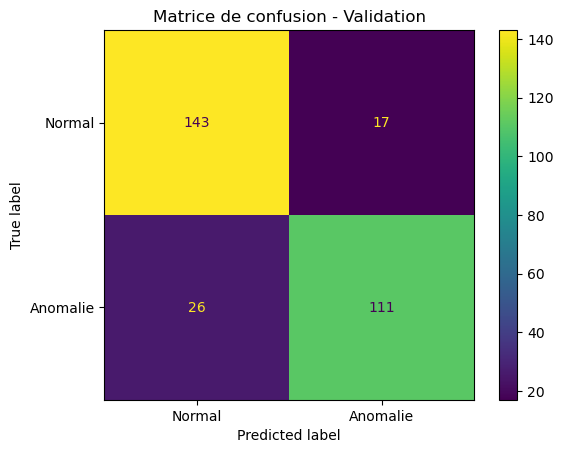

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred, display_labels=["Normal", "Anomalie"])
plt.title("Matrice de confusion - Validation")
plt.show()


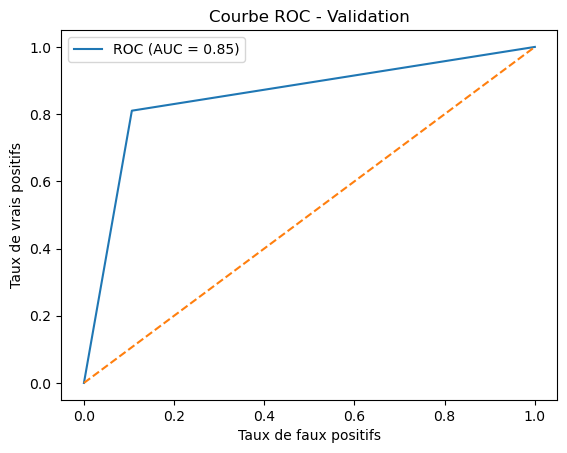

In [36]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_val, y_val_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.title("Courbe ROC - Validation")
plt.legend()
plt.show()


In [37]:
# Predict anomalies
val_preds = model_IsolationForest.predict(X_val)  # 1 = normal, -1 = anomaly
test_preds = model_IsolationForest.predict(X_test)

# Count anomalies directly
val_anomalies = (val_preds == -1).sum()
test_anomalies = (test_preds == -1).sum()

print(f" Number of anomalies detected in validation set: {val_anomalies}")
print(f" Number of anomalies detected in test set: {test_anomalies}")



 Number of anomalies detected in validation set: 128
 Number of anomalies detected in test set: 158


C:\Users\rjabj\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


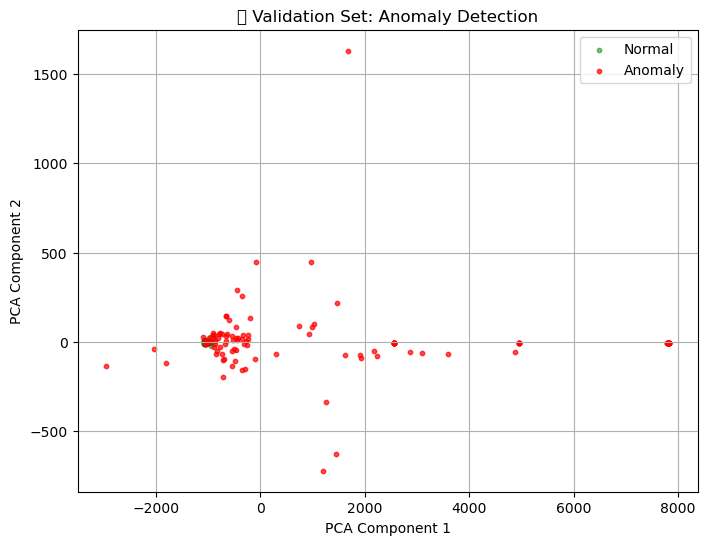

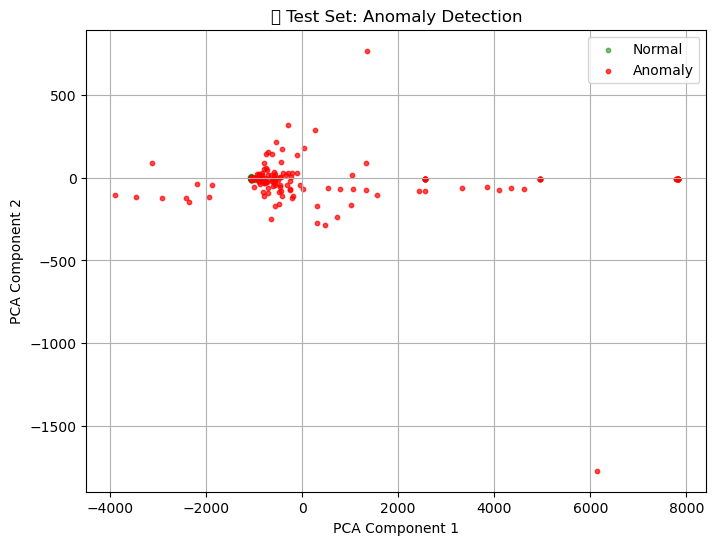

In [39]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# --- Step 1: Reduce to 2D using PCA ---
pca = PCA(n_components=2, random_state=42)
X_val_2d = pca.fit_transform(X_val)
X_test_2d = pca.transform(X_test)

# --- Step 2: Predict anomalies ---
val_preds = model_IsolationForest.predict(X_val)  # 1 = normal, -1 = anomaly
test_preds = model_IsolationForest.predict(X_test)

# --- Step 3: Convert predictions to 0 (normal), 1 (anomaly) ---
val_anomaly_mask = (val_preds == -1)
test_anomaly_mask = (test_preds == -1)

# --- Step 4: Plot ---
def plot_anomalies(X_2d, anomaly_mask, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_2d[~anomaly_mask, 0], X_2d[~anomaly_mask, 1], 
                c='green', label='Normal', s=10, alpha=0.5)
    plt.scatter(X_2d[anomaly_mask, 0], X_2d[anomaly_mask, 1], 
                c='red', label='Anomaly', s=10, alpha=0.7)
    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_anomalies(X_val_2d, val_anomaly_mask, "📌 Validation Set: Anomaly Detection")
plot_anomalies(X_test_2d, test_anomaly_mask, "📌 Test Set: Anomaly Detection")


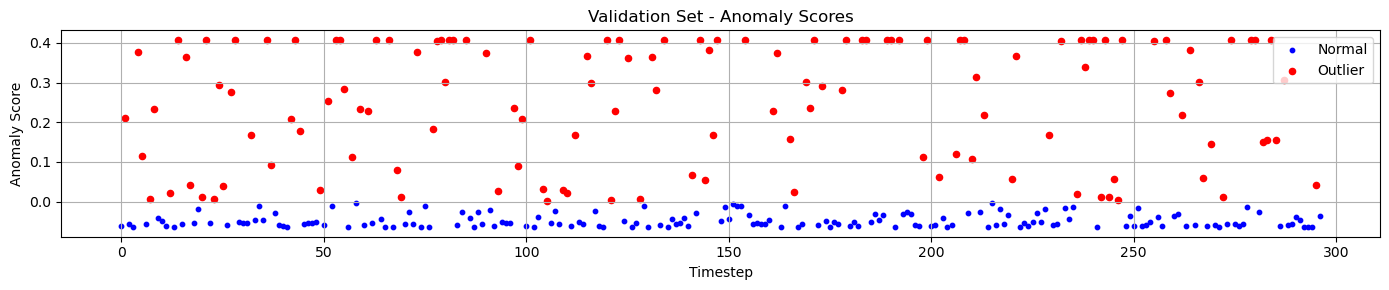

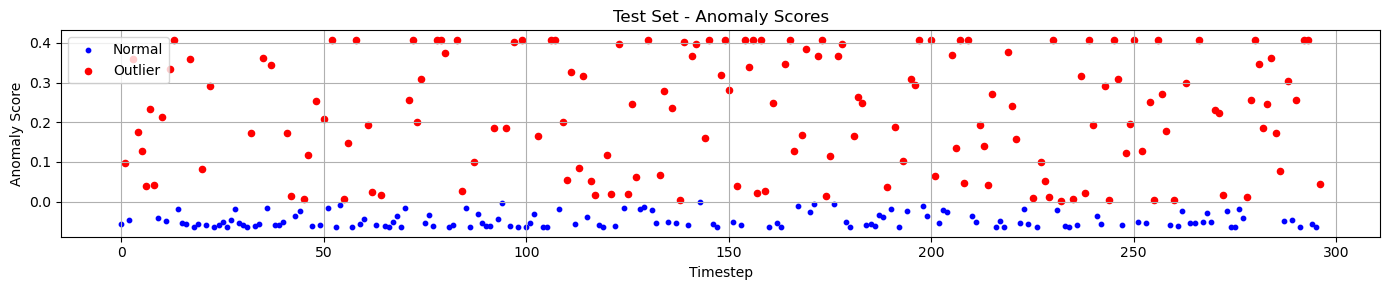

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Get anomaly scores (the lower, the more anomalous)
val_scores = model_IsolationForest.decision_function(X_val)
test_scores = model_IsolationForest.decision_function(X_test)

# Convert scores to errors (lower score = more anomalous, so we negate it)
val_errors = -val_scores
test_errors = -test_scores

# Predict labels: 1 (normal), -1 (anomaly)
val_preds = model_IsolationForest.predict(X_val)
test_preds = model_IsolationForest.predict(X_test)

# Build mask
val_anomalies = val_preds == -1
test_anomalies = test_preds == -1

# --- Plotting like your image ---
def plot_reconstruction_error(errors, preds, title):
    plt.figure(figsize=(14, 3))
    plt.title(title)
    plt.xlabel("Timestep")
    plt.ylabel("Anomaly Score")

    # Plot normal points
    plt.scatter(np.arange(len(errors))[preds == 1], errors[preds == 1], 
                color='blue', label="Normal", s=10)
    # Plot anomalies
    plt.scatter(np.arange(len(errors))[preds == -1], errors[preds == -1], 
                color='red', label="Outlier", s=20)
    
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Visualize ---
plot_reconstruction_error(val_errors, val_preds, "Validation Set - Anomaly Scores")
plot_reconstruction_error(test_errors, test_preds, "Test Set - Anomaly Scores")


## One class SVM

In [35]:
from sklearn.svm import OneClassSVM

In [36]:
ocsvm = OneClassSVM(kernel='rbf', nu=0.1, gamma='scale')  # adjust nu for expected anomaly ratio
ocsvm.fit(X_train)


val_preds = ocsvm.predict(X_val)
test_preds = ocsvm.predict(X_test)


val_preds = [0 if p == 1 else 1 for p in val_preds]
test_preds = [0 if p == 1 else 1 for p in test_preds]


def evaluate(true, pred, name):
    print(f"\nEvaluation on {name}:")
    print("Confusion Matrix:")
    print(confusion_matrix(true, pred))
    print("Classification Report:")
    print(classification_report(true, pred))

evaluate(y_val, val_preds, "Validation Set")
evaluate(y_test, test_preds, "Test Set")


📊 Evaluation on Validation Set:
Confusion Matrix:
[[160   0]
 [ 38  99]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      1.00      0.89       160
         1.0       1.00      0.72      0.84       137

    accuracy                           0.87       297
   macro avg       0.90      0.86      0.87       297
weighted avg       0.90      0.87      0.87       297


📊 Evaluation on Test Set:
Confusion Matrix:
[[135   2]
 [ 41 119]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.99      0.86       137
         1.0       0.98      0.74      0.85       160

    accuracy                           0.86       297
   macro avg       0.88      0.86      0.85       297
weighted avg       0.88      0.86      0.85       297



In [37]:
# Get anomaly scores for validation and test sets
val_scores = ocsvm.decision_function(X_val)
test_scores = ocsvm.decision_function(X_test)


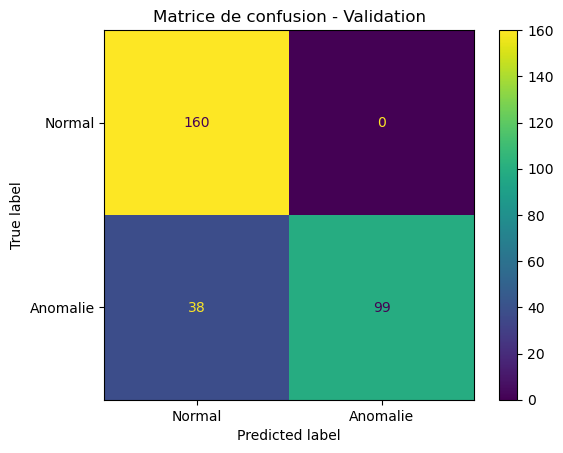

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_val_pred = ocsvm.predict(X_val)
y_test_pred = ocsvm.predict(X_test)
y_val_pred = [0 if x == 1 else 1 for x in y_val_pred]
y_test_pred = [0 if x == 1 else 1 for x in y_test_pred]
ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred, display_labels=["Normal", "Anomalie"])
plt.title("Matrice de confusion - Validation")
plt.show()

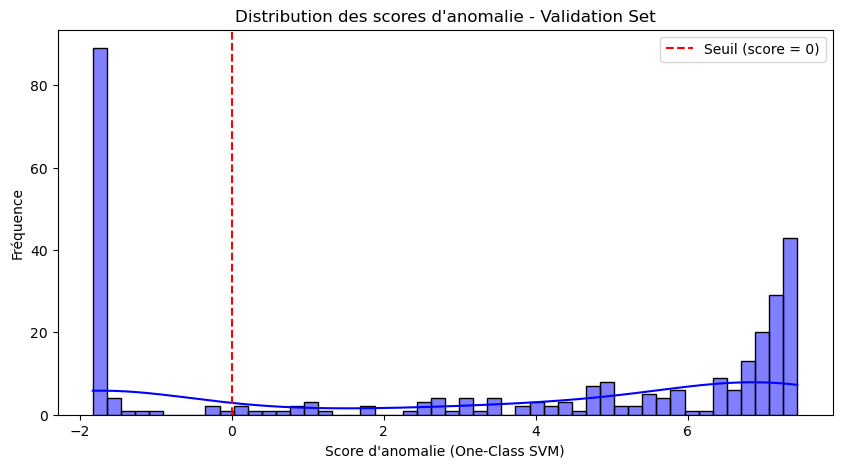

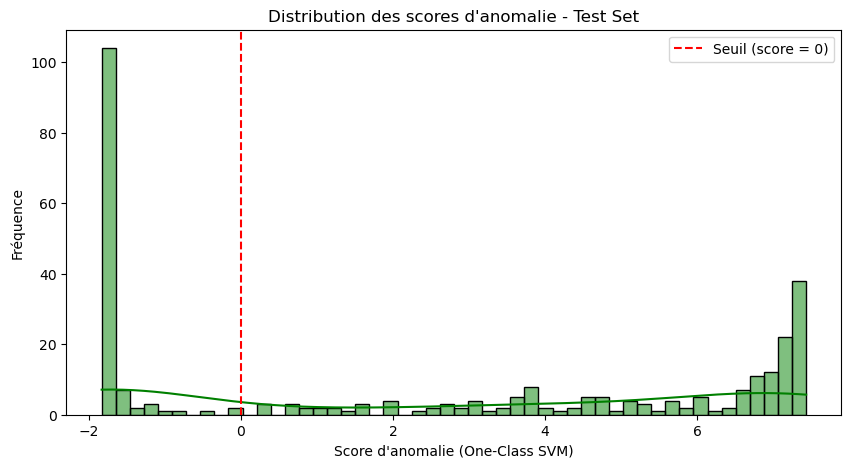

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot for validation set
plt.figure(figsize=(10, 5))
sns.histplot(val_scores, bins=50, kde=True, color='blue')
plt.title("Distribution des scores d'anomalie - Validation Set")
plt.xlabel("Score d'anomalie (One-Class SVM)")
plt.ylabel("Fréquence")
plt.axvline(x=0, color='red', linestyle='--', label='Seuil (score = 0)')
plt.legend()
plt.show()

# Plot for test set
plt.figure(figsize=(10, 5))
sns.histplot(test_scores, bins=50, kde=True, color='green')
plt.title("Distribution des scores d'anomalie - Test Set")
plt.xlabel("Score d'anomalie (One-Class SVM)")
plt.ylabel("Fréquence")
plt.axvline(x=0, color='red', linestyle='--', label='Seuil (score = 0)')
plt.legend()
plt.show()



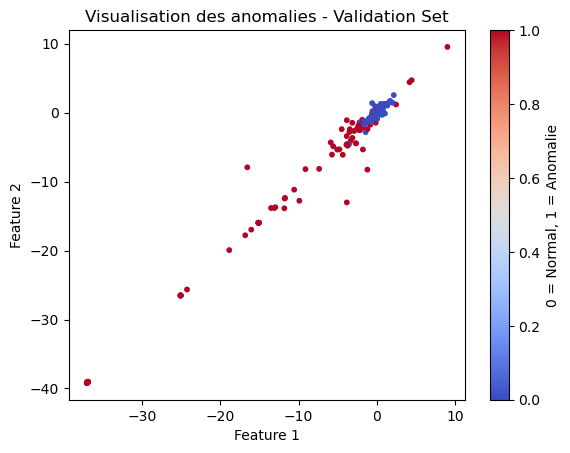

In [39]:
# For 2D data, plot anomalies
plt.scatter(X_val[:, 0], X_val[:, 1], c=val_preds, cmap='coolwarm', s=10)
plt.title("Visualisation des anomalies - Validation Set")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="0 = Normal, 1 = Anomalie")
plt.show()


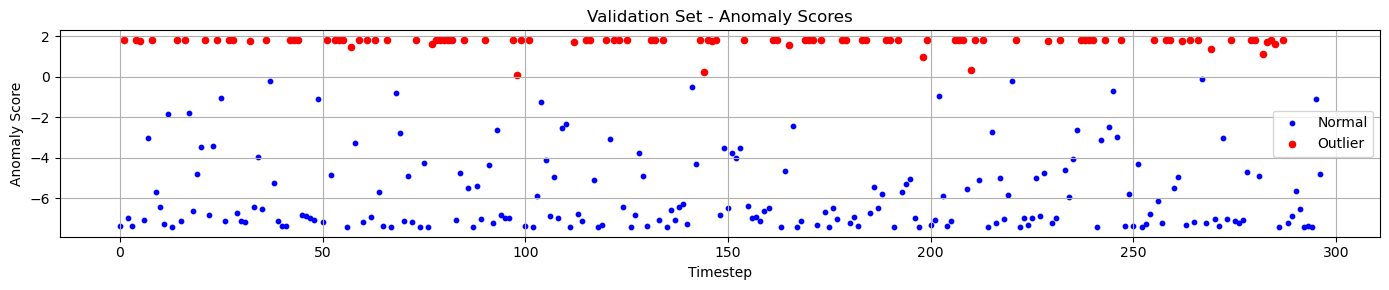

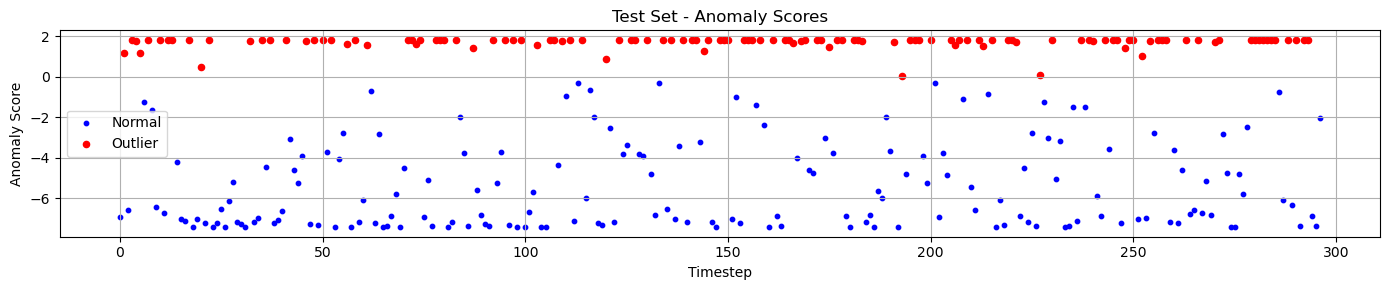

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Get anomaly scores (the lower, the more anomalous)
val_scores = ocsvm.decision_function(X_val)
test_scores = ocsvm.decision_function(X_test)

# Convert scores to errors (lower score = more anomalous, so we negate it)
val_errors = -val_scores
test_errors = -test_scores

# Predict labels: 1 (normal), -1 (anomaly)
val_preds = ocsvm.predict(X_val)
test_preds = ocsvm.predict(X_test)

# Build mask
val_anomalies = val_preds == -1
test_anomalies = test_preds == -1

# --- Plotting like your image ---
def plot_reconstruction_error(errors, preds, title):
    plt.figure(figsize=(14, 3))
    plt.title(title)
    plt.xlabel("Timestep")
    plt.ylabel("Anomaly Score")

    # Plot normal points
    plt.scatter(np.arange(len(errors))[preds == 1], errors[preds == 1], 
                color='blue', label="Normal", s=10)
    # Plot anomalies
    plt.scatter(np.arange(len(errors))[preds == -1], errors[preds == -1], 
                color='red', label="Outlier", s=20)
    
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Visualize ---
plot_reconstruction_error(val_errors, val_preds, "Validation Set - Anomaly Scores")
plot_reconstruction_error(test_errors, test_preds, "Test Set - Anomaly Scores")


In [40]:
# Predict anomalies
val_preds = ocsvm.predict(X_val)  # 1 = normal, -1 = anomaly
test_preds = ocsvm.predict(X_test)

# Count anomalies directly
val_anomalies = (val_preds == -1).sum()
test_anomalies = (test_preds == -1).sum()

print(f" Number of anomalies detected in validation set: {val_anomalies}")
print(f" Number of anomalies detected in test set: {test_anomalies}")


 Number of anomalies detected in validation set: 99
 Number of anomalies detected in test set: 121


## autoencoder-based-anomaly-detection